<a href="https://colab.research.google.com/github/mrrezkii/Python-DWBI-80Cereals/blob/main/80_Cereals_analysts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#read file
cereal_df = pd.read_csv("https://raw.githubusercontent.com/mrrezkii/Python-DWBI-80Cereals/main/80-cereal.csv", sep = ';')
cereal_df.head(n=80)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [ ]:
# find value for each column
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
# find mode for each column\
cereal_df.mode(numeric_only=True, dropna=False)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,110.0,3.0,1.0,0.0,0.0,13.0,3.0,35.0,25.0,3.0,1.0,1.0,18.042851
1,NaN,NaN,NaN,NaN,NaN,15.0,NaN,90.0,NaN,NaN,NaN,NaN,19.823573
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,21.871292
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.396513
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.736446
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.804043
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.734515
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.753301
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.025765
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.592785


In [ ]:
# find variance for each column
cereal_df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


calories     379.630895
protein        1.198565
fat            1.012987
sodium      7027.853725
fiber          5.680424
carbo         18.309467
sugars        19.757006
potass      5081.809638
vitamins     499.188312
shelf          0.693096
weight         0.022643
cups           0.054157
rating       197.326321
dtype: float64

In [ ]:
# find skewness for each column
cereal_df.skew(axis = 0, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


calories   -0.445407
protein     0.745830
fat         1.165989
sodium     -0.575711
fiber       2.431675
carbo      -0.447929
sugars      0.034618
potass      1.350971
vitamins    2.463704
shelf      -0.410339
weight      0.309857
cups       -0.104981
rating      0.910240
dtype: float64

In [ ]:
# find kurtosis for each column
cereal_df.kurt(axis = 0, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


calories    2.370146
protein     1.184656
fat         2.044655
sodium     -0.345243
fiber       8.647492
carbo       1.331088
sugars     -1.141621
potass      1.891166
vitamins    6.257233
shelf      -1.439201
weight      5.422454
cups        0.352226
rating      1.318747
dtype: float64

LinearRegression()

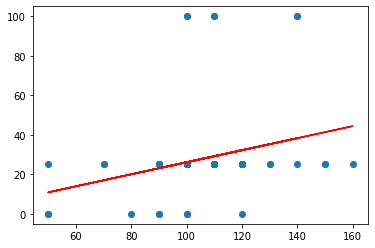

In [ ]:
# Linear regression `calories` and `vitamins`
X = cereal_df['calories'].values.reshape(-1, 1)
Y = cereal_df['vitamins'].values.reshape(-1, 1)

linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

LinearRegression()

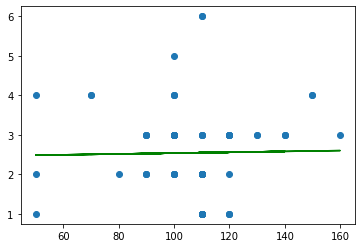

In [ ]:
# Linear regression `calories` and `protein`
X = cereal_df['calories'].values.reshape(-1, 1)
Y = cereal_df['protein'].values.reshape(-1, 1)

linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='green')
plt.show()

LinearRegression()

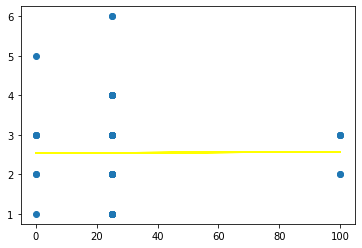

In [ ]:
# Linear regression `vitamins` and `protein`
X = cereal_df['vitamins'].values.reshape(-1, 1)
Y = cereal_df['protein'].values.reshape(-1, 1)

linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='yellow')
plt.show()